<a href="https://colab.research.google.com/github/LuqmanFiqri/5300_final/blob/main/PHYSICS_5300_Final_Problem_Orbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gravitational Orbits

This notebook solve two-body problem for gravitational attraction between two bodies in Cartesian coordinates. 


## Euler-Lagrange Equations



The Lagrangian for the two-body problem:

$\begin{align}
  \mathcal{L} &= T - U 
  \\\\
  &= \frac{1}{2}m_1\dot r_1^2 + \frac{1}{2}m_2\dot r_2^2 + \frac{Gm_1m_2}{|\vec{r_1} - \vec{r_2}|} 
  \\\\
  &= \frac{1}{2}m_1(\dot x_1^2 + \dot y_1^2) + \frac{1}{2}m_2(\dot x_2^2 + \dot y_2^2) + \frac{Gm_1m_2} {\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}}
\end{align}$

The Euler-Lagrange Equations:

\\
$\begin{align}
  \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_1} &= \frac{\partial\mathcal{L}}{\partial x_1} 
  \quad\Longrightarrow\quad \ddot x_1 = -Gm_2\frac{x_1 - x_2}{[(x_1-x_2)^2 + (y_1 - y_2)^2]^{3/2}} 
  \\\\
  \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_1} &= \frac{\partial\mathcal{L}}{\partial y_1} 
  \quad\Longrightarrow\quad \ddot y_1 = -Gm_2\frac{y_1 - y_2}{[(x_1-x_2)^2 + (y_1 - y_2)^2]^{3/2}}
  \\\\
    \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot x_2} &= \frac{\partial\mathcal{L}}{\partial x_2} 
  \quad\Longrightarrow\quad \ddot x_2 = Gm_1\frac{x_1 - x_2}{[(x_1-x_2)^2 + (y_1 - y_2)^2]^{3/2}} 
  \\\\
  \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot y_2} &= \frac{\partial\mathcal{L}}{\partial y_2} 
  \quad\Longrightarrow\quad \ddot y_2 = Gm_1\frac{y_1 - y_2}{[(x_1-x_2)^2 + (y_1 - y_2)^2]^{3/2}}
\end{align}$

\\
Create a vector m which consists of:

\\
$\begin{align}
 \mathbf{M}(t) = \left(\begin{array}{c}
                         x_1(t) \\
                         \dot x_1(t) \\
                         y_1(t) \\
                         \dot y_1(t) \\
                          x_2(t) \\
                         \dot x_2(t) \\
                         y_2(t) \\
                         \dot y_2(t) \\
                        \end{array}
                  \right)
  \quad\Longrightarrow\quad
\mathbf{\dot M}(t) = \left(\begin{array}{c}
                         \dot x_1(t) \\
                         \ddot x_1(t) \\
                         \dot y_1(t) \\
                         \ddot y_1(t) \\
                         \dot x_2(t) \\
                         \ddot x_2(t) \\
                         \dot y_2(t) \\
                         \ddot y_2(t)
                        \end{array}
                  \right)  
\end{align}$

## Code

This section consists the code to solve the problem

### Libraries, Class, Functions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

from matplotlib import animation, rc
from IPython.display import HTML

In [20]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [21]:
class Gravitational_Orbits():
    """
    This class uses the parameters and the Euler-Lagrange's Equations for
    two particles orbiting under gravitational attraction.

    Parameters
    ----------
    m1 : float
        first mass of pendulum 
    m2 : float
        second mass of pendulum
    G  : float
        gravitational constant

    Methods
    -------
    dm_dt(t, m)
        Returns the right side of the differential equation in vector m, 
        given time t and the corresponding value of m.
    solve_ode
        Returns the solution for the differential equations    

    """

    def __init__(self, m1=1., m2=1., G=1):
        
        self.m1 = m1
        self.m2 = m2
        self.G = G
 
    def dm_dt(self, t, m):
        """
        This function returns the right-hand side of the diffeq: 
        [x_1_dot, x_1_ddot, y_1_dot, y_1_ddot,
          x_2_dot, x_2_ddot, y_2_dot, y_2_ddot]
        
        Parameters
        ----------
        t : float
            time 
        m : float
            A 8-component vector with 
            m[0] = x_1, m[1] = x_1_dot, 
            m[2] = y_1, m[3] = y_1_dot,
            m[4] = x_2, m[5] = x_2_dot, 
            m[6] = y_2, m[7] = y_2_dot,
            
        Returns
        -------
        [x_1_dot, x_1_ddot, y_1_dot, y_1_ddot,
          x_2_dot, x_2_ddot, y_2_dot, y_2_ddot]

        """
        diff_x = m[0] - m[4]
        diff_y = m[2] - m[6]

        r12 = np.sqrt(diff_x**2 + diff_y**2)

        x_1_ddot = -self.G * self.m2 * diff_x / r12**3
        y_1_ddot = -self.G * self.m2 * diff_y / r12**3
        x_2_ddot =  self.G * self.m1 * diff_x / r12**3
        y_2_ddot =  self.G * self.m1 * diff_y / r12**3

        return [m[1], x_1_ddot,
                m[3], y_1_ddot,
                m[5], x_2_ddot,
                m[7], y_2_ddot]


    def solve_ode(self, t_pts, m_0,
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        solution = solve_ivp(self.dm_dt, (t_pts[0], t_pts[-1]), 
                             m_0, t_eval=t_pts, method='RK23', 
                             atol=abserr, rtol=relerr)
        
        x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = solution.y


        return x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot


    def solve_ode_Leapfrog(self, t_pts, m_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]

        x_1_0, x_1_dot_0, y_1_0, y_1_dot_0, \
        x_2_0, x_2_dot_0, y_2_0, y_2_dot_0 = m_0
        
        # initialize the arrays for m with zeros
        num_t_pts = len(t_pts)

        x_1 = np.zeros(num_t_pts)
        x_1_dot = np.zeros(num_t_pts)
        x_1_dot_half = np.zeros(num_t_pts)

        y_1 = np.zeros(num_t_pts)
        y_1_dot = np.zeros(num_t_pts)
        y_1_dot_half = np.zeros(num_t_pts)

        x_2 = np.zeros(num_t_pts)
        x_2_dot = np.zeros(num_t_pts)
        x_2_dot_half = np.zeros(num_t_pts)

        y_2 = np.zeros(num_t_pts)
        y_2_dot = np.zeros(num_t_pts)
        y_2_dot_half = np.zeros(num_t_pts)

        # initial conditions

        x_1[0] = x_1_0
        x_1_dot[0] = x_1_dot_0

        y_1[0] = y_1_0
        y_1_dot[0] = y_1_dot_0

        x_2[0] = x_2_0
        x_2_dot[0] = x_2_dot_0

        y_2[0] = y_2_0
        y_2_dot[0] = y_2_dot_0

        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]

            m = [x_1[i], x_1_dot[i], y_1[i], y_1_dot[i],
                 x_2[i], x_2_dot[i], y_2[i], y_2_dot[i]]

            out = self.dm_dt(t, m)

            x_1_dot_half[i] = x_1_dot[i] + out[1] * delta_t / 2.
            x_1[i+1] = x_1[i] + x_1_dot_half[i] * delta_t

            y_1_dot_half[i] = y_1_dot[i] + out[3] * delta_t / 2.
            y_1[i+1] = y_1[i] + y_1_dot_half[i] * delta_t

            x_2_dot_half[i] = x_2_dot[i] + out[5] * delta_t / 2.
            x_2[i+1] = x_2[i] + x_2_dot_half[i] * delta_t

            y_2_dot_half[i] = y_2_dot[i] + out[7] * delta_t / 2.
            y_2[i+1] = y_2[i] + y_2_dot_half[i] * delta_t

            m = [x_1[i+1], x_1_dot[i], y_1[i+1], y_1_dot[i],
                 x_2[i+1], x_2_dot[i], y_2[i+1], y_2_dot[i]]

            out = self.dm_dt(t, m)

            x_1_dot[i+1] = x_1_dot_half[i] + out[1] * delta_t / 2.
            y_1_dot[i+1] = y_1_dot_half[i] + out[3] * delta_t / 2.
            x_2_dot[i+1] = x_2_dot_half[i] + out[5] * delta_t / 2.
            y_2_dot[i+1] = y_2_dot_half[i] + out[7] * delta_t / 2.

        return x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot


    def solve_ode_Leapfrog_Gen(self, t_pts, m_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays for m with zeros
        num_t_pts = len(t_pts)
        n_tot = len(m_0)
        m = np.zeros(shape=(n_tot, num_t_pts))
        dot_half = np.zeros(int(n_tot / 2))
        
        # initial conditions
        m[:, 0] = m_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]

            m_now = m[:,i]
            out = np.asarray(self.dm_dt(t,m_now))

            dot_half = m_now[1::2] + out[1::2] * delta_t / 2.
            m[0::2, i+1] = m_now[0::2] + dot_half * delta_t

            m_now[0::2] = m[0::2, i+1]
            out = np.asarray(self.dm_dt(t,m_now))

            m[1::2, i+1] = dot_half + out[1::2] * delta_t / 2.

        return m
        
    
    def energy(self, t_pts, m):
        """
        Evaluate the energy as a function of time
        
        m[0] = x_1, m[1] = x_1_dot, 
        m[2] = y_1, m[3] = y_1_dot,
        m[4] = x_2, m[5] = x_2_dot, 
        m[6] = y_2, m[7] = y_2_dot,
        
        """
        T = 0.5 * self.m1 * (m[1]**2 + m[3]**2) + \
            0.5 * self.m2 * (m[5]**2 + m[7]**2)
        
        diff_x = m[0] - m[4]
        diff_y = m[2] - m[6]

        r12 = np.sqrt(diff_x**2 + diff_y**2)

        U = - self.G * self.m1 * self.m2 / r12

        return T + U

In [22]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [23]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

### Main Code
This section consists of the main code for the plots and animation for the orbits

#### Plot Generation (Using ODE solvers)

This section generates the orbit for $m_1$ and $m_2$.

In [24]:
# Labels for the individuals plot axes
orbit_labels = (r'$x$', r'$y$')

# Create the time array
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end + delta_t, delta_t)


##### First Plot

In [25]:
# Parameters

G = 0.1
m_1 = 1.
m_2 = 30.

# Instantiate a set of orbits
O1 = Gravitational_Orbits(m1=m_1, m2=m_2, G=G)

# Set up initial conditions
x_1_0, x_1_dot_0 = 1., 0.
y_1_0, y_1_dot_0 = 0., 1.
x_2_0, x_2_dot_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_1_dot_0
y_2_0, y_2_dot_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_1_dot_0

m_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0, 
       x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]

# Solve the Euler-Lagrange Equations
x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = O1.solve_ode(t_pts, m_0)



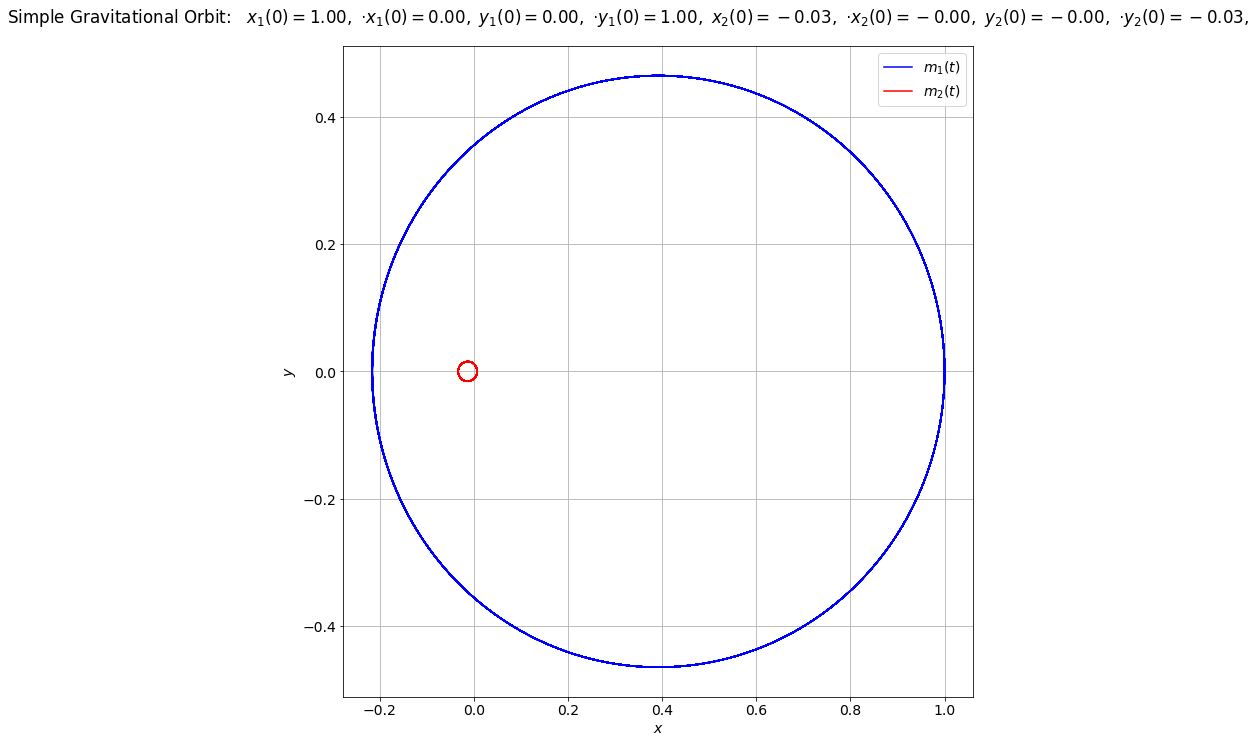

In [26]:
# Create a plot
fig1 = plt.figure(figsize=(10,10))
overall_title = 'Simple Gravitational Orbit:  ' + \
                rf' $x_1(0) = {x_1_0:.2f},$' + \
                rf' $\dot x_1(0) = {x_1_dot_0:.2f},$' + \
                rf' $y_1(0) = {y_1_0:.2f},$' + \
                rf' $\dot y_1(0) = {y_1_dot_0:.2f},$' + \
                rf' $x_2(0) = {x_2_0:.2f},$' + \
                rf' $\dot x_2(0) = {x_2_dot_0:.2f},$' + \
                rf' $y_2(0) = {y_2_0:.2f},$' + \
                rf' $\dot y_2(0) = {y_2_dot_0:.2f},$' + \
                 '\n'     # \n means a new line (adds some space here)
fig1.suptitle(overall_title, va='baseline')

ax_a = fig1.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=orbit_labels,
            color='blue',
            label=rf'$m_1(t)$', 
            title=None,
            ax=ax_a)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=orbit_labels,
            color='red',
            label=rf'$m_2(t)$', 
            title=None,
            ax=ax_a)  

ax_a.grid()
fig1.tight_layout()
# fig1.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')

Based on Orbit_games notebook, the plot is replicated using the initial conditions from the notebook by changing the variable $r$, $\dot r$, $\phi$, and angular momentum $l$ into $x_1, y_1, x_2$ and $y_2$. Make the mass $m_2$, be larger than mass $m_1$, which makes $m_2$ as the center of mass. Since $m_2 >> m_1$, then $\dot x_2$ and $\dot y_2$ are zero, which make the center of mass is static. 

The equations are:

\\
$\begin{align}
  \vec{r} &= \vec{r_1} - \vec{r_2} \\\\
  |r| &= |\vec{r_1} - \vec{r_2}| \\\\
      &= \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} \\\\
      &= r
      \\\\
  x_{20} &= -\frac{m_1}{m_2} x_{10} \\\\
  \dot x_{20} &= -\frac{m_1}{m_2} \dot x_{20} \\\\
  y_{20} &= -\frac{m_1}{m_2} y_{10} \\\\
  \dot y_{20} &= -\frac{m_1}{m_2} \dot y_{20} \\\\
\end{align}$

\\
$\begin{align}
  \mathcal{l_0} &= m_1 x_{10} \dot y_{10} 
  \quad\Longrightarrow\quad \dot y_{10} = \frac{m_1 x_{10}}{\mathcal{l_0}} 
  \\\\
  k &= -Gm_1m_2 \\\\
\end{align}$


Since $m_2 >> m_1$, then $\dot x_2$ and $\dot y_2$ are zero, which make the center of mass is static.

In the Orbit_games notebook, the parameters and initial conditions are set to be $k = -3, r_0 = 1, \dot r_0 = 0, \phi_0 = 0$ and $l = 1$. 

In this code, the parameters are set to $G = 0.1, m_1 = 1, m_2 = 30, x_{10} = \dot y_{10} = 1$ and $\dot x_{10} = y_{10} = 0$ to match with the Orbit_games notebook parameters and initial conditions.



##### Second Plot

In [27]:
# Parameters

G = 1.
m_1 = 1.
m_2 = 5.

# Instantiate a set of orbits
O2 = Gravitational_Orbits(m1=m_1, m2=m_2, G=G)

# Set up initial conditions
x_1_0, x_1_dot_0 = 1., -1.
y_1_0, y_1_dot_0 = 1., 1.
x_2_0, x_2_dot_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_1_dot_0
y_2_0, y_2_dot_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_1_dot_0

m_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0, 
       x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]

# Solve the Euler-Lagrange Equations
x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot = O2.solve_ode(t_pts, m_0)

m = [x_1, x_1_dot, y_1, y_1_dot, x_2, x_2_dot, y_2, y_2_dot]

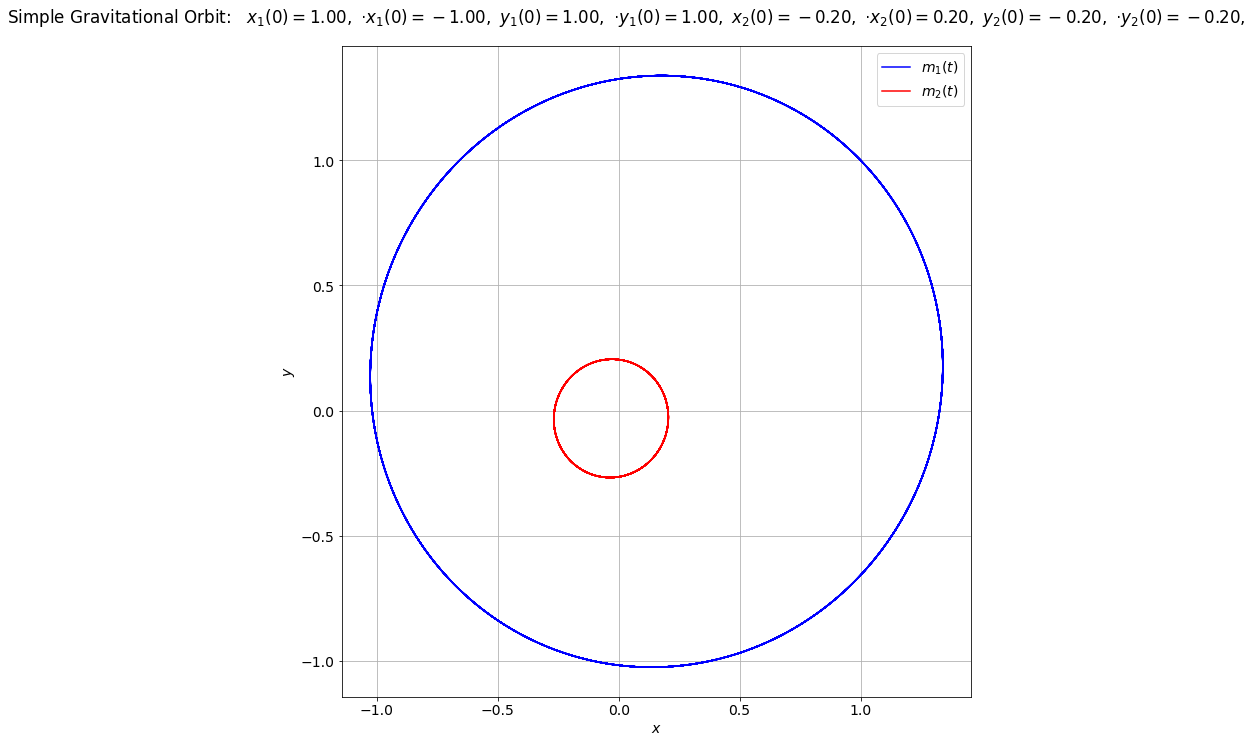

In [28]:
# Create a plot
fig2 = plt.figure(figsize=(10,10))
overall_title = 'Simple Gravitational Orbit:  ' + \
                rf' $x_1(0) = {x_1_0:.2f},$' + \
                rf' $\dot x_1(0) = {x_1_dot_0:.2f},$' + \
                rf' $y_1(0) = {y_1_0:.2f},$' + \
                rf' $\dot y_1(0) = {y_1_dot_0:.2f},$' + \
                rf' $x_2(0) = {x_2_0:.2f},$' + \
                rf' $\dot x_2(0) = {x_2_dot_0:.2f},$' + \
                rf' $y_2(0) = {y_2_0:.2f},$' + \
                rf' $\dot y_2(0) = {y_2_dot_0:.2f},$' + \
                 '\n'     # \n means a new line (adds some space here)
fig2.suptitle(overall_title, va='baseline')

ax_b = fig2.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1[start : stop], y_1[start : stop], 
            axis_labels=orbit_labels,
            color='blue',
            label=rf'$m_1(t)$', 
            title=None,
            ax=ax_b)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_2[start : stop], y_2[start : stop], 
            axis_labels=orbit_labels,
            color='red',
            label=rf'$m_2(t)$', 
            title=None,
            ax=ax_b)  

ax_b.grid()
fig2.tight_layout()
# fig2.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')

#### Solve the Equations using Leapfrog Method
This section consists of solving the Euler-Lagrange Equations using Leapfrog method

In [29]:
# Parameters

G = 1.
m_1 = 1.
m_2 = 5.

# Instantiate a set of orbits
O1 = Gravitational_Orbits(m1=m_1, m2=m_2, G=G)

# Set up initial conditions
x_1_0, x_1_dot_0 = 1., -1.
y_1_0, y_1_dot_0 = 1., 1.
x_2_0, x_2_dot_0 = -(m_1 / m_2) * x_1_0, -(m_1 / m_2) * x_1_dot_0
y_2_0, y_2_dot_0 = -(m_1 / m_2) * y_1_0, -(m_1 / m_2) * y_1_dot_0

m_0 = [x_1_0, x_1_dot_0, y_1_0, y_1_dot_0, 
       x_2_0, x_2_dot_0, y_2_0, y_2_dot_0]

# Solve the Euler-Lagrange Equations
x_1L, x_1L_dot, y_1L, y_1L_dot, x_2L, x_2L_dot, y_2L, y_2L_dot = O1.solve_ode_Leapfrog(t_pts, m_0)

m_L = [x_1L, x_1L_dot, y_1L, y_1L_dot, x_2L, x_2L_dot, y_2L, y_2L_dot]

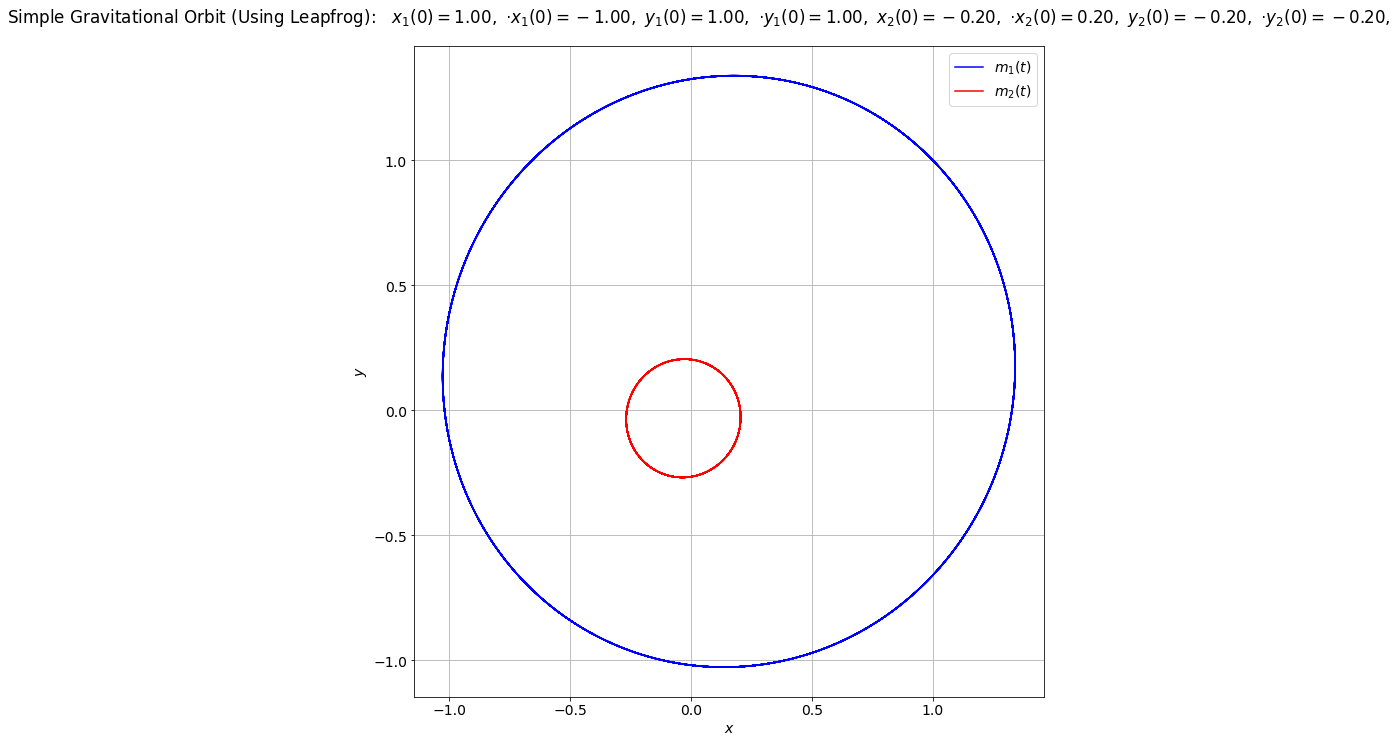

In [30]:
# Create a plot
fig3 = plt.figure(figsize=(10,10))
overall_title = 'Simple Gravitational Orbit (Using Leapfrog):  ' + \
                rf' $x_1(0) = {x_1_0:.2f},$' + \
                rf' $\dot x_1(0) = {x_1_dot_0:.2f},$' + \
                rf' $y_1(0) = {y_1_0:.2f},$' + \
                rf' $\dot y_1(0) = {y_1_dot_0:.2f},$' + \
                rf' $x_2(0) = {x_2_0:.2f},$' + \
                rf' $\dot x_2(0) = {x_2_dot_0:.2f},$' + \
                rf' $y_2(0) = {y_2_0:.2f},$' + \
                rf' $\dot y_2(0) = {y_2_dot_0:.2f},$' + \
                 '\n'     # \n means a new line (adds some space here)
fig3.suptitle(overall_title, va='baseline')

ax_c = fig3.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_1L[start : stop], y_1L[start : stop], 
            axis_labels=orbit_labels,
            color='blue',
            label=rf'$m_1(t)$', 
            title=None,
            ax=ax_c)

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(x_2L[start : stop], y_2L[start : stop], 
            axis_labels=orbit_labels,
            color='red',
            label=rf'$m_2(t)$', 
            title=None,
            ax=ax_c)  

ax_c.grid()
fig3.tight_layout()
# fig1.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')

#### Plot for Change of Energy with time for ODE Solver and Leapfrog Method

In [31]:
# Energy Difference for ODE Solver
E_tot_pts = O1.energy(t_pts, m)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

# Energy Difference for Leapfrog Method
E_tot_pts_L = O1.energy(t_pts, m_L)
E_tot_0_L = E_tot_pts_L[0]
E_tot_rel_pts_L = np.abs((E_tot_pts_L - E_tot_0_L)/E_tot_0_L)


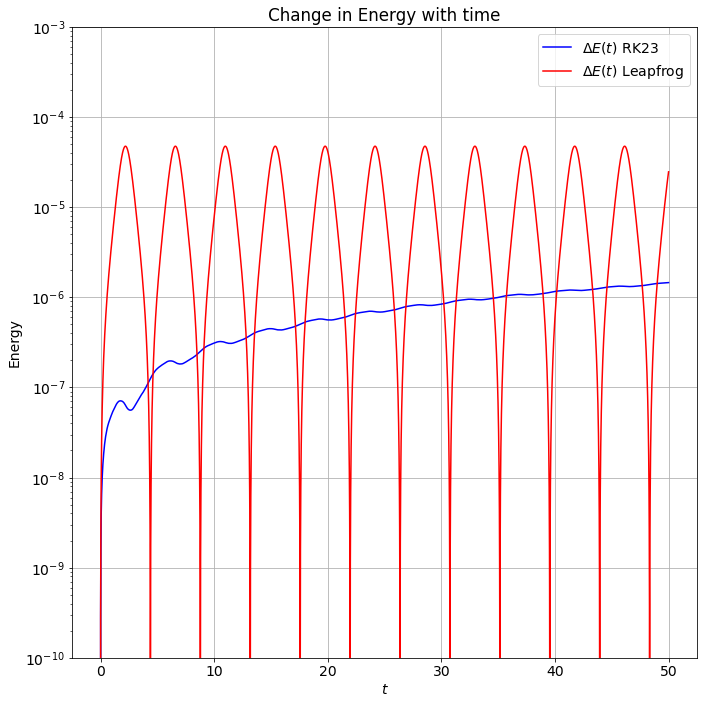

In [32]:
fig_4 = plt.figure(figsize=(10,10))

ax_5a = fig_4.add_subplot(1,1,1)

ax_5a.semilogy(t_pts, E_tot_rel_pts, 
               color='blue', label=r'$\Delta E(t)$ RK23')
ax_5a.semilogy(t_pts, E_tot_rel_pts_L, 
               color='red', label=r'$\Delta E(t)$ Leapfrog')
ax_5a.set_ylim(1.e-10, 1.e-3)    # (1.e-12, 5)
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in Energy with time')
ax_5a.legend()

ax_5a.grid()
fig_4.tight_layout()
# fig_4.savefig('energy_change_1.png', dpi=200, bbox_inches='tight')


Based on the plot, we can see that the energy for the Leapfrog Method is conserved since the change of energy is at a constant value as time increases while the energy for the ODE Solver is increasing which shows that energy is not conserved. 

#### Animation of the orbit

In [33]:
%%capture

x_min = -2
x_max = -x_min
y_min = -2
y_max = -y_min

fig_anim = plt.figure(figsize=(5,5), num='Double pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min,x_max)
ax_anim.set_ylim(y_min,y_max)

# By assigning the first return from plot to line_anim, we can later change 
# the values in the line.
ln1_anim, = ax_anim.plot(x_1, y_1, color='blue', lw=1)
ln2_anim, = ax_anim.plot(x_2, y_2, color='red', lw=1)

pt1_anim, = ax_anim.plot(x_1[0], y_1[0], 'o', markersize=8, color='blue')
pt2_anim, = ax_anim.plot(x_2[0], y_2[0], 'o', markersize=8, color='red')

ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()


In [34]:
def orbit_animation(i):
    """
    This is the function called by FuncAnimation to create each frame,
    numbered by i.  So each i corresponds to a point in the t_pts 
    array, with index i.

    """

    i_skip = 1 * i

    pt1_anim.set_data(x_1[i_skip], y_1[i_skip])
    pt2_anim.set_data(x_2[i_skip], y_2[i_skip])

    return (pt1_anim, pt2_anim)


In [35]:
frame_interval = 10.  # time between frames
frame_number = 1001   # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               orbit_animation, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

In [36]:
HTML(anim.to_jshtml())